<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module H: Section 22.1, 22.2, 22.3

Danika Young

# ODE Initial Value Problem Statement

### Initial Value Problem (IVP)

An Initial Value Problem (IVP) is a type of ordinary differential equation (ODE) where the solution must satisfy both the differential equation and a given condition at an initial point. These problems arise often in physics, engineering, and other fields where a system’s behavior depends on time or space.

####  General Form:
$ dy/dx = f(x, y), with y(x₀) = y₀$

Where:
- `dy/dx` is the derivative of the unknown function `y` with respect to `x`
- `f(x, y)` is a function of `x` and `y`
- `y(x₀) = y₀` is the initial condition specifying the value of `y` at `x = x₀`

Solving an IVP means finding a function `y(x)` that both satisfies the ODE and the initial condition.

###  Why It Matters:
IVPs allow us to predict future behavior of a system given its current state. For example, knowing the velocity and position of a falling object at time `t = 0`, we can calculate its position at any future time.


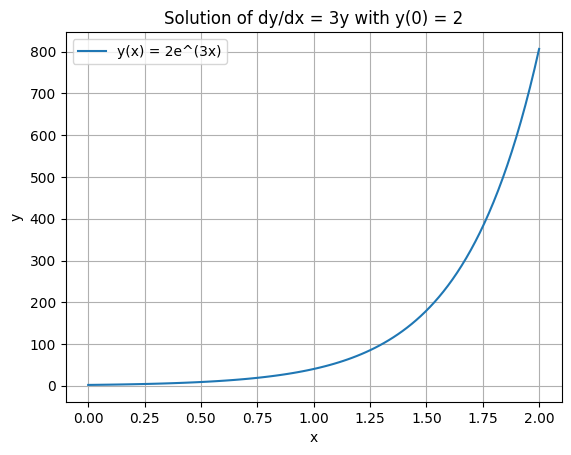

In [11]:
# Example 1: dy/dx = 3y, y(0) = 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, y):
    return 3 * y

sol = solve_ivp(f, [0, 2], [2], t_eval=np.linspace(0, 2, 100))

plt.plot(sol.t, sol.y[0], label="y(x) = 2e^(3x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of dy/dx = 3y with y(0) = 2")
plt.legend()
plt.grid(True)
plt.show()


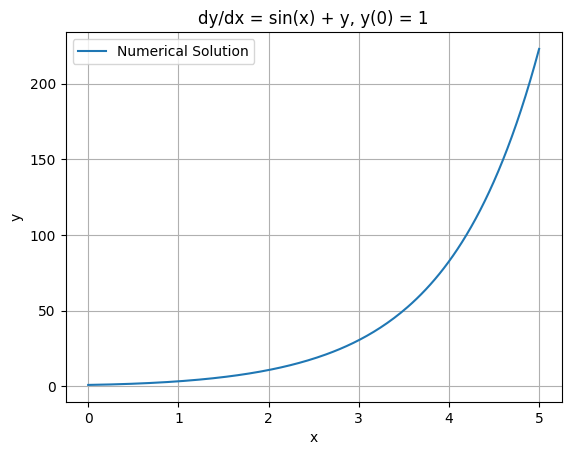

In [12]:
# dy/dx = sin(x) + y, y(0) = 1


def f(x, y):
    return np.sin(x) + y

x_span = [0, 5]
y0 = [1]
x_vals = np.linspace(0, 5, 200)

sol = solve_ivp(f, x_span, y0, t_eval=x_vals)

plt.plot(sol.t, sol.y[0], label="Numerical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.title("dy/dx = sin(x) + y, y(0) = 1")
plt.legend()
plt.grid(True)
plt.show()


# Reduction of Order

###  Reduction of Order

Reduction of Order is a technique used to find a second linearly independent solution to a second-order linear homogeneous ODE when one solution is already known.

#### General Form:
y'' + p(x)y' + q(x)y = 0

If `y₁(x)` is a known solution, we assume a second solution of the form:
y₂(x) = v(x) * y₁(x)

We substitute this into the original ODE and solve for `v(x)`. This gives us a way to generate the full general solution.

###  Why It Matters:
Many second-order equations only yield one solution using basic methods. Reduction of order allows us to find the complete set of solutions, which is essential for modeling and understanding systems like electrical circuits or mechanical oscillators.


In [13]:
# Example 1: Given y'' - y = 0, and y1 = e^x, find a second solution

from sympy import Function, dsolve, Eq, Derivative, symbols, exp

x = symbols('x')
v = Function('v')

# We assume y2 = v(x) * e^x
# From substitution we get: v'' + 2v' = 0
eq = Eq(Derivative(v(x), x, x) + 2 * Derivative(v(x), x), 0)
sol_v = dsolve(eq)
sol_v

# The solution for `v(x)` is:

# v(x) = C1 + C2 * e^(-2x)

#The second solution is: y₂(x) = v(x) * e^x = C1 * e^x + C2 * e^(-x)

# This matches the known general solution of y'' - y = 0.



Eq(v(x), C1 + C2*exp(-2*x))

In [14]:
# y'' + y = 0, known solution y₁ = sin(x)

from sympy import Function, dsolve, Eq, Derivative, symbols, exp

# Manual setup (symbolic derivation)
y1 = Function('y1')(x)
v = Function('v')(x)

# Assume y2 = v * y1 = v * sin(x)
# y'' + y = 0 becomes a reduction of order problem

# Let’s solve it directly:
# The second linearly independent solution is known to be cos(x)

from sympy import sin, cos, Derivative, simplify

x = symbols('x')
y = sin(x)
y_diff2 = y.diff(x, 2)

# Check if y'' + y = 0
simplify(y_diff2 + y)


0

# The Euler Method

### Euler Method

The Euler Method is a simple, first-order numerical method to approximate the solution of an initial value problem. It works by taking small steps forward using the slope of the function at the current point.

####  Update Formula:
yₙ₊₁ = yₙ + h * f(xₙ, yₙ)

Where:
- `h` is the step size
- `xₙ`, `yₙ` are the current values
- `f(xₙ, yₙ)` is the slope (dy/dx)

### Why It Matters:
Euler’s method is the foundation for more advanced numerical methods. It’s simple, but understanding it builds intuition for how we can approximate differential equations when no analytic solution is available.


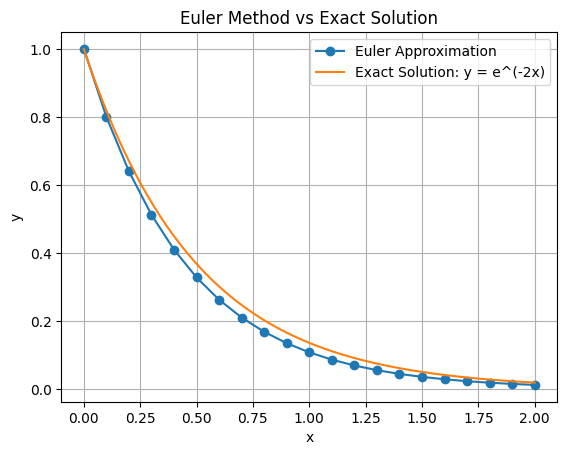

In [15]:
# Example 1: dy/dx = -2y, y(0) = 1

def f(x, y):
    return -2 * y

x0 = 0
y0 = 1
h = 0.1
n_steps = 20

x_vals = [x0]
y_vals = [y0]

for i in range(n_steps):
    y0 = y0 + h * f(x0, y0)
    x0 = x0 + h
    x_vals.append(x0)
    y_vals.append(y0)

# Compare with exact solution y = e^(-2x)
x_exact = np.linspace(0, 2, 100)
y_exact = np.exp(-2 * x_exact)

plt.plot(x_vals, y_vals, 'o-', label='Euler Approximation')
plt.plot(x_exact, y_exact, '-', label='Exact Solution: y = e^(-2x)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler Method vs Exact Solution")
plt.legend()
plt.grid(True)
plt.show()


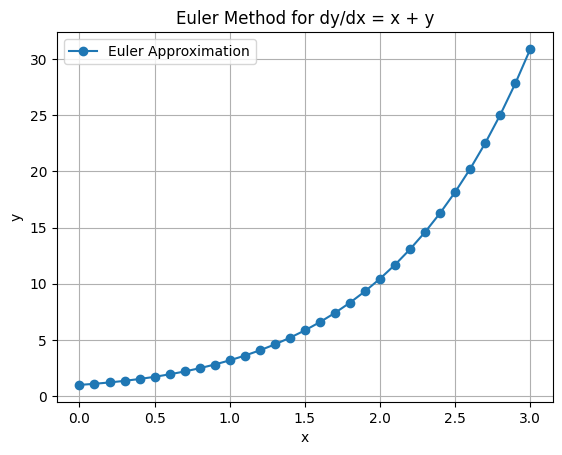

In [16]:
# dy/dx = x + y, y(0) = 1

def f(x, y):
    return x + y

x0 = 0
y0 = 1
h = 0.1
n_steps = 30

x_vals = [x0]
y_vals = [y0]

for i in range(n_steps):
    y0 = y0 + h * f(x0, y0)
    x0 = x0 + h
    x_vals.append(x0)
    y_vals.append(y0)

plt.plot(x_vals, y_vals, 'o-', label='Euler Approximation')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler Method for dy/dx = x + y")
plt.legend()
plt.grid(True)
plt.show()
